In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
data = pd.read_csv("CarPrice_regression .csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
data['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [5]:
data.shape

(205, 26)

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_columns = ['fueltype','aspiration','doornumber','enginelocation']
for i in label_columns:
    data[i]=label_encoder.fit_transform(data[i])
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,1,convertible,rwd,0,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,1,convertible,rwd,0,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,1,hatchback,rwd,0,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,0,sedan,fwd,0,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,0,sedan,4wd,0,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
data['cylindernumber'] = data['cylindernumber'].map({'four':4,'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8})

In [8]:
onehot_columns = ['carbody','drivewheel','enginetype','fuelsystem']
data = pd.get_dummies(data, columns = onehot_columns)
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,1,0,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,1,0,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,1,0,1,0,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,1,0,0,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,1,0,0,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_ID               205 non-null    int64  
 1   symboling            205 non-null    int64  
 2   CarName              205 non-null    object 
 3   fueltype             205 non-null    int32  
 4   aspiration           205 non-null    int32  
 5   doornumber           205 non-null    int32  
 6   enginelocation       205 non-null    int32  
 7   wheelbase            205 non-null    float64
 8   carlength            205 non-null    float64
 9   carwidth             205 non-null    float64
 10  carheight            205 non-null    float64
 11  curbweight           205 non-null    int64  
 12  cylindernumber       205 non-null    int64  
 13  enginesize           205 non-null    int64  
 14  boreratio            205 non-null    float64
 15  stroke               205 non-null    flo

In [10]:
data.drop(['car_ID','CarName'],axis=1,inplace=True)

In [11]:
data.corr()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
symboling,1.000000,0.194311,-0.059866,0.664073,0.212471,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,...,-0.013597,0.245950,-0.037911,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
fueltype,0.194311,1.000000,-0.401397,0.191491,0.040070,-0.308346,-0.212679,-0.233880,-0.284631,-0.217275,...,0.085556,0.046383,0.078293,0.226565,0.040070,-1.000000,0.023020,0.302574,0.070457,0.023020
aspiration,-0.059866,-0.401397,1.000000,-0.031792,-0.057191,0.257611,0.234539,0.300567,0.087311,0.324902,...,-0.070070,-0.066203,-0.111748,-0.323378,-0.057191,0.401397,0.149190,-0.050041,0.394703,-0.032857
doornumber,0.664073,0.191491,-0.031792,1.000000,0.137757,-0.447357,-0.398568,-0.207168,-0.552208,-0.197379,...,0.052138,0.159463,0.094687,-0.020525,0.137757,-0.191491,0.079143,-0.025019,0.146272,0.079143
enginelocation,0.212471,0.040070,-0.057191,0.137757,1.000000,-0.187790,-0.050989,-0.051698,-0.106234,0.050468,...,-0.031711,-0.017192,-0.029019,-0.083975,-0.014851,-0.040070,-0.008532,0.132429,-0.026114,-0.008532
wheelbase,-0.531954,-0.308346,0.257611,-0.447357,-0.187790,1.000000,0.874587,0.795144,0.589435,0.776386,...,0.166152,-0.081174,-0.191073,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
carlength,-0.357612,-0.212679,0.234539,-0.398568,-0.050989,0.874587,1.000000,0.841118,0.491029,0.877728,...,0.244053,-0.057877,-0.297330,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245
carwidth,-0.232919,-0.233880,0.300567,-0.207168,-0.051698,0.795144,0.841118,1.000000,0.279210,0.867032,...,0.348869,-0.013699,-0.194078,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158
carheight,-0.541038,-0.284631,0.087311,-0.552208,-0.106234,0.589435,0.491029,0.279210,1.000000,0.295572,...,-0.065063,-0.238720,-0.035289,-0.079418,-0.206225,0.284631,-0.101245,0.108685,-0.278615,-0.066778
curbweight,-0.227691,-0.217275,0.324902,-0.197379,0.050468,0.776386,0.877728,0.867032,0.295572,1.000000,...,0.400878,-0.039196,-0.233857,-0.577159,-0.040801,0.217275,0.034431,0.520220,-0.002434,0.024052


In [12]:
X = data.drop('price',axis=1).values
y = data['price'].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0000000000000002
Min:  0.0


In [15]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
2/2 [==============================] - 2s 272ms/step - loss: 237047216.0000 - val_loss: 250717232.0000
Epoch 2/400
2/2 [==============================] - 0s 48ms/step - loss: 237046736.0000 - val_loss: 250716688.0000
Epoch 3/400
2/2 [==============================] - 0s 48ms/step - loss: 237046128.0000 - val_loss: 250716032.0000
Epoch 4/400
2/2 [==============================] - 0s 32ms/step - loss: 237045456.0000 - val_loss: 250715264.0000
Epoch 5/400
2/2 [==============================] - 0s 64ms/step - loss: 237044656.0000 - val_loss: 250714304.0000
Epoch 6/400
2/2 [==============================] - 0s 48ms/step - loss: 237043680.0000 - val_loss: 250713168.0000
Epoch 7/400
2/2 [==============================] - 0s 56ms/step - loss: 237042464.0000 - val_loss: 250711696.0000
Epoch 8/400
2/2 [==============================] - 0s 48ms/step - loss: 237041008.0000 - val_loss: 250709840.0000
Epoch 9/400
2/2 [==============================] - 0s 32ms/step - loss: 237039168.0000 

Epoch 73/400
2/2 [==============================] - 0s 32ms/step - loss: 29875288.0000 - val_loss: 43039156.0000
Epoch 74/400
2/2 [==============================] - 0s 24ms/step - loss: 29270404.0000 - val_loss: 42459812.0000
Epoch 75/400
2/2 [==============================] - 0s 24ms/step - loss: 28706994.0000 - val_loss: 41898924.0000
Epoch 76/400
2/2 [==============================] - 0s 24ms/step - loss: 28195382.0000 - val_loss: 41307048.0000
Epoch 77/400
2/2 [==============================] - 0s 24ms/step - loss: 27676790.0000 - val_loss: 40687936.0000
Epoch 78/400
2/2 [==============================] - 0s 24ms/step - loss: 27109944.0000 - val_loss: 40028624.0000
Epoch 79/400
2/2 [==============================] - 0s 24ms/step - loss: 26568860.0000 - val_loss: 39318504.0000
Epoch 80/400
2/2 [==============================] - 0s 24ms/step - loss: 26052744.0000 - val_loss: 38645664.0000
Epoch 81/400
2/2 [==============================] - 0s 24ms/step - loss: 25513440.0000 - val_los

2/2 [==============================] - 0s 56ms/step - loss: 11387059.0000 - val_loss: 21228734.0000
Epoch 146/400
2/2 [==============================] - 0s 24ms/step - loss: 11378355.0000 - val_loss: 21183914.0000
Epoch 147/400
2/2 [==============================] - 0s 56ms/step - loss: 11224916.0000 - val_loss: 20831022.0000
Epoch 148/400
2/2 [==============================] - 0s 25ms/step - loss: 11155866.0000 - val_loss: 20577688.0000
Epoch 149/400
2/2 [==============================] - 0s 32ms/step - loss: 11016391.0000 - val_loss: 20479576.0000
Epoch 150/400
2/2 [==============================] - 0s 24ms/step - loss: 10933868.0000 - val_loss: 20280198.0000
Epoch 151/400
2/2 [==============================] - 0s 32ms/step - loss: 10904549.0000 - val_loss: 20069692.0000
Epoch 152/400
2/2 [==============================] - 0s 32ms/step - loss: 10767730.0000 - val_loss: 20088114.0000
Epoch 153/400
2/2 [==============================] - 0s 56ms/step - loss: 10644334.0000 - val_loss: 20

2/2 [==============================] - 0s 64ms/step - loss: 3652120.5000 - val_loss: 16004906.0000
Epoch 290/400
2/2 [==============================] - 0s 24ms/step - loss: 3708642.2500 - val_loss: 15982096.0000
Epoch 291/400
2/2 [==============================] - 0s 56ms/step - loss: 3677601.2500 - val_loss: 15499693.0000
Epoch 292/400
2/2 [==============================] - 0s 24ms/step - loss: 3575977.0000 - val_loss: 14706015.0000
Epoch 293/400
2/2 [==============================] - 0s 56ms/step - loss: 3536688.0000 - val_loss: 14119195.0000
Epoch 294/400
2/2 [==============================] - 0s 24ms/step - loss: 3598739.5000 - val_loss: 14050932.0000
Epoch 295/400
2/2 [==============================] - 0s 56ms/step - loss: 3547141.7500 - val_loss: 14555088.0000
Epoch 296/400
2/2 [==============================] - 0s 32ms/step - loss: 3506123.7500 - val_loss: 15172226.0000
Epoch 297/400
2/2 [==============================] - 0s 48ms/step - loss: 3478695.5000 - val_loss: 15465762.00

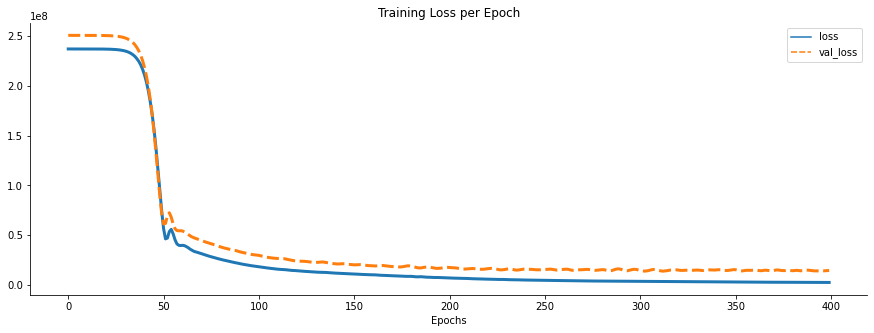

In [16]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [18]:
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',data['price'].describe())

2/2 [==============================] - 0s 8ms/step
MAE:  2499.979480278201
MSE:  14437464.306422519
RMSE:  3799.6663414598024
Variance Regression Score:  0.8290360277231066


Descriptive Statistics:
 count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


In [21]:
# fueatures of new house
One_car = data.drop('price',axis=1).iloc[0]
print(f'Features of car:\n{One_car}')

# reshape the numpy array and scale the features
One_car = scaler.transform(One_car.values.reshape(-1, 42))

# run the model and get the price prediction
print('\nPrediction Price:',model.predict(One_car)[0,0])

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of car:
symboling                 3.00
fueltype                  1.00
aspiration                0.00
doornumber                1.00
enginelocation            0.00
wheelbase                88.60
carlength               168.80
carwidth                 64.10
carheight                48.80
curbweight             2548.00
cylindernumber            4.00
enginesize              130.00
boreratio                 3.47
stroke                    2.68
compressionratio          9.00
horsepower              111.00
peakrpm                5000.00
citympg                  21.00
highwaympg               27.00
carbody_convertible       1.00
carbody_hardtop           0.00
carbody_hatchback         0.00
carbody_sedan             0.00
carbody_wagon             0.00
drivewheel_4wd            0.00
drivewheel_fwd            0.00
drivewheel_rwd            1.00
enginetype_dohc           1.00
enginetype_dohcv          0.00
enginetype_l              0.00
enginetype_ohc            0.00
enginetype_ohcf       